# Extract Transform and Load 


In [1]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from openpyxl import Workbook
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
%matplotlib inline
from scipy import stats
sns.set(color_codes=True)
sns.set(style='whitegrid')
import seaborn as sns

### Load data set



Introducing data with closed csr and significant features from BigML

In [2]:

df = pd.read_excel('../Data/Prepared/AllColumns_AllDates_OnlyClosed_2Classes.xlsx')
#df2 = pd.read_excel('../Data/Prepared/Backlog_Analysis_04_closed_all_columns.xlsx') #categorization
#df3 = pd.read_excel('../Data/Prepared/Backlog_Analysis_04_closed_all_columns.xlsx') #for modeling
df.describe()

,CSR ID,3PP (Vol),CROU BP,3PP (Days),Duration (Days),Flag: CSR Backdated / Forwarded,Flag: Hot,Flag: Hot FTS,Flag: CB Backdated,CB Not Prov Overdue (Vol),...,Date: REM Prov# Day,Date: RST Acc# DOW,Date: RST Acc# Year,Date: RST Acc# Month,Date: RST Acc# Day,Date: RST Prov# DOW,Date: RST Prov# Year,Date: RST Prov# Month,Date: RST Prov# Day,45DAYS
count,6.467000e+03,6467.000000,6.467000e+03,6467.000000,6467.000000,6467.000000,6467.000000,6467.000000,6467.000000,6467.000000,...,6467.000000,6451.000000,6451.000000,6451.000000,6451.000000,6467.000000,6467.000000,6467.000000,6467.000000,6467.000000
mean,3.461264e+06,0.036648,1.122977e+06,0.369298,33.861965,0.410237,0.011443,0.002165,0.001082,0.002629,...,15.496057,2.452178,2018.559138,6.562083,15.216556,2.445956,2018.507036,6.543065,15.457244,0.223133
std,1.014512e+05,0.187910,6.344276e+03,5.110819,51.672347,0.491915,0.106365,0.046481,0.032885,0.051208,...,8.848649,1.787727,0.560203,3.531165,8.841976,1.776129,0.546964,3.545183,8.891351,0.416379
min,3.145537e+06,0.000000,1.102585e+06,-247.179820,0.001620,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,2017.000000,1.000000,1.000000,0.000000
25%,3.373896e+06,0.000000,1.124026e+06,0.000000,4.961865,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,1.000000,2018.000000,3.000000,7.000000,1.000000,2018.000000,3.000000,8.000000,0.000000
50%,3.463964e+06,0.000000,1.124026e+06,0.000000,16.800120,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,2.000000,2019.000000,7.000000,15.000000,2.000000,2019.000000,7.000000,16.000000,0.000000
75%,3.545502e+06,0.000000,1.124026e+06,0.000000,40.866835,1.000000,0.000000,0.000000,0.000000,0.000000,...,23.000000,4.000000,2019.000000,10.000000,23.000000,4.000000,2019.000000,10.000000,23.000000,0.000000
max,3.645045e+06,1.000000,1.245727e+06,167.724350,543.734180,1.000000,1.000000,1.000000,1.000000,1.000000,...,31.000000,6.000000,2020.000000,12.000000,31.000000,6.000000,2020.000000,12.000000,31.000000,1.000000


In [3]:
df.head()

,CSR ID,3PP (Vol),Business Units,Competence Domain,Competence SubDomain,Contract Type,CNS,CROU BP,3PP (Days),Duration (Days),...,Date: REM Prov# Day,Date: RST Acc# DOW,Date: RST Acc# Year,Date: RST Acc# Month,Date: RST Acc# Day,Date: RST Prov# DOW,Date: RST Prov# Year,Date: RST Prov# Month,Date: RST Prov# Day,45DAYS
0,3145537,0,BDGS,OSS,SERVICE MANAGEMENT,Advanced,ARCHIVED - *EEM/VODAFON,1124025,0.0,334.75487,...,14,0.0,2018.0,1.0,15.0,2,2017,4,19,1
1,3212336,0,BDGS;BICS,OSS,SERVICE MANAGEMENT,Advanced,ARCHIVED - *EEM/VODAFON,1124025,0.0,239.24635,...,20,2.0,2018.0,2.0,14.0,6,2017,10,8,1
2,3243118,0,BNES;BNEW,Local,LOCAL,Advanced,IBMO/CNS,1124026,0.0,155.25679,...,22,1.0,2019.0,1.0,22.0,3,2018,12,27,1
3,3251878,0,BNES;BNEW,"IP, Broadband & Core",MOBILE SWITCHING,Advanced,ARCHIVED - *EEM/VODAFON,1124025,0.0,117.29055,...,20,1.0,2018.0,9.0,4.0,2,2017,12,20,1
4,3257192,0,BDGS;BICS,BSS,"CHARGING, MM AND SERVENABLE",Advanced,IBMO/CNS,1124026,0.0,63.90988,...,27,0.0,2018.0,4.0,16.0,1,2018,2,27,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6467 entries, 0 to 6466
Columns: 124 entries, CSR ID to 45DAYS
dtypes: float64(24), int64(69), object(31)
memory usage: 5.4+ MB


* This data set is filtered in SQL with only Finished & Follow up regiters. 84 columns + 3 target variables 
* Variables are selected based on results from BigML

In [5]:
df["45DAYS"] = df["45DAYS"].astype(int)

In [6]:
df["45DAYS"].value_counts()

0    5024
1    1443
Name: 45DAYS, dtype: int64

In [7]:
df.head()

,CSR ID,3PP (Vol),Business Units,Competence Domain,Competence SubDomain,Contract Type,CNS,CROU BP,3PP (Days),Duration (Days),...,Date: REM Prov# Day,Date: RST Acc# DOW,Date: RST Acc# Year,Date: RST Acc# Month,Date: RST Acc# Day,Date: RST Prov# DOW,Date: RST Prov# Year,Date: RST Prov# Month,Date: RST Prov# Day,45DAYS
0,3145537,0,BDGS,OSS,SERVICE MANAGEMENT,Advanced,ARCHIVED - *EEM/VODAFON,1124025,0.0,334.75487,...,14,0.0,2018.0,1.0,15.0,2,2017,4,19,1
1,3212336,0,BDGS;BICS,OSS,SERVICE MANAGEMENT,Advanced,ARCHIVED - *EEM/VODAFON,1124025,0.0,239.24635,...,20,2.0,2018.0,2.0,14.0,6,2017,10,8,1
2,3243118,0,BNES;BNEW,Local,LOCAL,Advanced,IBMO/CNS,1124026,0.0,155.25679,...,22,1.0,2019.0,1.0,22.0,3,2018,12,27,1
3,3251878,0,BNES;BNEW,"IP, Broadband & Core",MOBILE SWITCHING,Advanced,ARCHIVED - *EEM/VODAFON,1124025,0.0,117.29055,...,20,1.0,2018.0,9.0,4.0,2,2017,12,20,1
4,3257192,0,BDGS;BICS,BSS,"CHARGING, MM AND SERVENABLE",Advanced,IBMO/CNS,1124026,0.0,63.90988,...,27,0.0,2018.0,4.0,16.0,1,2018,2,27,1


### Mapping TRUE/FALSE to 0/1 and creating a target variable with 4 classes
*  L22DAYS=1 Less than 35 days Stretched
*  M22L45=2 More than 35 less than 40 Commitment
*
*  M45DAYS=0 More than 45 Off-Track

In [8]:
df["45DAYS"].value_counts()

0    5024
1    1443
Name: 45DAYS, dtype: int64

In [9]:


# find all rows that fulfills your conditions and set class to 1
#df.loc[(df['45DAYS']==1), # if total is > 100 
    # 'Class'] = 1 # then set class to 1

In [10]:
df.head()

,CSR ID,3PP (Vol),Business Units,Competence Domain,Competence SubDomain,Contract Type,CNS,CROU BP,3PP (Days),Duration (Days),...,Date: REM Prov# Day,Date: RST Acc# DOW,Date: RST Acc# Year,Date: RST Acc# Month,Date: RST Acc# Day,Date: RST Prov# DOW,Date: RST Prov# Year,Date: RST Prov# Month,Date: RST Prov# Day,45DAYS
0,3145537,0,BDGS,OSS,SERVICE MANAGEMENT,Advanced,ARCHIVED - *EEM/VODAFON,1124025,0.0,334.75487,...,14,0.0,2018.0,1.0,15.0,2,2017,4,19,1
1,3212336,0,BDGS;BICS,OSS,SERVICE MANAGEMENT,Advanced,ARCHIVED - *EEM/VODAFON,1124025,0.0,239.24635,...,20,2.0,2018.0,2.0,14.0,6,2017,10,8,1
2,3243118,0,BNES;BNEW,Local,LOCAL,Advanced,IBMO/CNS,1124026,0.0,155.25679,...,22,1.0,2019.0,1.0,22.0,3,2018,12,27,1
3,3251878,0,BNES;BNEW,"IP, Broadband & Core",MOBILE SWITCHING,Advanced,ARCHIVED - *EEM/VODAFON,1124025,0.0,117.29055,...,20,1.0,2018.0,9.0,4.0,2,2017,12,20,1
4,3257192,0,BDGS;BICS,BSS,"CHARGING, MM AND SERVENABLE",Advanced,IBMO/CNS,1124026,0.0,63.90988,...,27,0.0,2018.0,4.0,16.0,1,2018,2,27,1


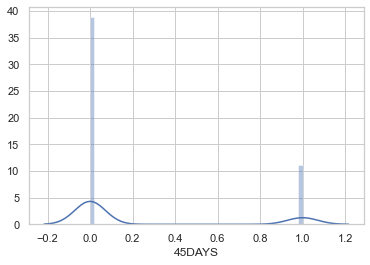

In [11]:
sns.distplot(df["45DAYS"]);

In [12]:
df["45DAYS"].value_counts()

0    5024
1    1443
Name: 45DAYS, dtype: int64

In [13]:
df.isnull().sum()

CSR ID                    0
3PP (Vol)                 0
Business Units           11
Competence Domain         0
Competence SubDomain      0
                         ..
Date: RST Prov# DOW       0
Date: RST Prov# Year      0
Date: RST Prov# Month     0
Date: RST Prov# Day       0
45DAYS                    0
Length: 124, dtype: int64

In [14]:
le = preprocessing.LabelEncoder()
for i in ['Business Units',
'Competence Domain',
'Competence SubDomain',
'Contract Type',
'CNS',
'CROU BP',
'Cause Code',
'CSR Closed (Vol)',
'Cost Allocation',
'DEL Acc (Vol)',
'DEL Pend Acc (Vol)',
'DEL Rej (Vol)',
'Issue Category',
'Last Status',
'CSR Open (Vol)',
'Original Severity',
'CSR Origin',
'Product Life Cycle',
'REM Not Prov Overdue (Vol)',
'REM Prov on Tgt (Vol)',
'RST Acc not on Tgt (Vol)',
'RST Acc on Tgt (Vol)',
'CSR Type',
'CSR (Vol)',
'Customer',
'Flag: Customer Adaptation',
'Customer Country',
'Global Customer Name',
'MELA SF',
'Hours',
'MELA SF2',
'Last year CSRs',
'Network',
'Flag: New CSR',
'Flag: RST Backdated',
'Severity',
'Sold to Party', 
'Sold to Party Country',
'Status',
'KA',
'EER Country',
'EROU Level',
'EROU SF',
'EROU SF Full Name',
'Final Ext# Customer',
'Final Ext# Customer',
'Final Ext# Customer Country',
'Date: Started DOW',
'Date: Started Year',
'Date: Started Month',
'Date: Started Day',
'Date: Closed DOW',
'Date: Closed Year',
'Date: Closed Month',
'Date: Closed Day',
'Date: Last Status DOW',
'Date: Last Status Year',
'Date: Last Status Month',
'Date: Last Status Day',
'Date: Reported DOW',
'Date: Reported Year',
'Date: Reported Month',
'Date: Reported Day',
'Date: CB Prov# DOW',
'Date: CB Prov# Year',
'Date: CB Prov# Month',
'Date: CB Prov# Day',
'Date: Last Change DOW',
'Date: Last Change Year',
'Date: Last Change Month',
'Date: Last Change Day',
'Date: REM Acc# DOW',
'Date: REM Acc# Year',
'Date: REM Acc# Month',
'Date: REM Acc# Day',
'Date: REM Prov# DOW',
'Date: REM Prov# Year',
'Date: REM Prov# Month',
'Date: REM Prov# Day',
'Date: RST Acc# DOW',
'Date: RST Acc# Year',
'Date: RST Acc# Month',
'Date: RST Acc# Day',
'Date: RST Prov# DOW',
'Date: RST Prov# Year',
'Date: RST Prov# Month',
'Date: RST Prov# Day']:

    df[i] = le.fit_transform(df[i].astype(str))

In [15]:
df.replace(np.nan,0,inplace=True) 

In [16]:
df2=df.drop([642],axis=0)

In [17]:
df2.iat[642,54]

1

In [18]:
np.where(np.isnan(df)) #to find where NaN values are located 

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:

#df2=df2.drop(["45DAYS"],axis=1) # dropping the column for each class 

In [19]:
df2=df2.drop(["Service Prim Number"],axis=1) # dropping the column for each class 

In [20]:
df2=df2.drop(["Duration (Days)"],axis=1) # dropping the column for each class 

In [21]:
for col in df2.columns: 
    print(col) 

CSR ID
3PP (Vol)
Business Units
Competence Domain
Competence SubDomain
Contract Type
CNS
CROU BP
3PP (Days)
Flag: CSR Backdated / Forwarded
Flag: Hot
Flag: Hot FTS
Cause Code
Flag: CB Backdated
CB Not Prov Overdue (Vol)
CB Prov on Tgt (Vol)
CB Prov (Vol)
CSR Closed (Vol)
Cost Allocation
DEL Acc (Vol)
DEL Pend Acc (Vol)
DEL Prov (Vol)
DEL Rej (Vol)
Issue Category
Last Status
CSR Open (Vol)
Original Severity
CSR Origin
Flag: Overdue CSR
Product Life Cycle
REM Acc (Vol)
REM Not Prov Overdue (Vol)
REM Prov not on Tgt (Vol)
REM Prov on Tgt (Vol)
REM Prov (Vol)
REM Rej (Vol)
RST Acc not on Tgt (Vol)
RST Acc on Tgt (Vol)
RST Acc (Vol)
RST not Prov Overdue (Vol)
RST pend Acc (Vol)
RST Prov not on Tgt (Vol)
RST Prov on Tgt (Vol)
RST Prov (Vol)
FAs Rej# (Vol)
CSR Type
CSR (Vol)
Customer
Flag: Customer Adaptation
Customer Country
Global Customer Name
MELA SF
Hours
MELA SF2
x Days - TMR after CSR Closure
Local Hours
Global Hours
KA
Hrs/CSR
EER Country
EROU Level
EROU SF
EROU SF Full Name
Final Ext

In [22]:

df2


,CSR ID,3PP (Vol),Business Units,Competence Domain,Competence SubDomain,Contract Type,CNS,CROU BP,3PP (Days),Flag: CSR Backdated / Forwarded,...,Date: REM Prov# Day,Date: RST Acc# DOW,Date: RST Acc# Year,Date: RST Acc# Month,Date: RST Acc# Day,Date: RST Prov# DOW,Date: RST Prov# Year,Date: RST Prov# Month,Date: RST Prov# Day,45DAYS
0,3145537,0,0,6,16,0,2,7,0.0,0,...,5,0,1,0,6,2,0,6,10,1
1,3212336,0,1,6,16,0,2,7,0.0,0,...,12,2,1,4,5,6,0,1,29,1
2,3243118,0,6,4,8,0,8,8,0.0,0,...,14,1,2,0,14,3,1,3,19,1
3,3251878,0,6,3,11,0,2,7,0.0,0,...,12,1,1,11,25,2,0,3,12,1
4,3257192,0,1,0,1,0,8,8,0.0,0,...,19,0,1,6,7,1,1,4,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6462,3640423,0,0,3,4,0,8,8,0.0,0,...,10,3,2,3,10,3,2,3,10,0
6463,3641016,0,0,4,8,1,8,8,0.0,1,...,12,4,2,3,12,4,2,3,12,0
6464,3641623,0,7,3,11,0,8,8,0.0,0,...,10,3,2,3,10,3,2,3,10,0
6465,3642159,0,7,7,9,0,8,8,0.0,0,...,12,4,2,3,12,4,2,3,12,0


# TARGET VARIABLE CLASS has the following classes: 
* 0 for M45DAYS 1441

* 1 for L22DAYS 3635

* 2 for M22L45 1341

### Balancing target

In [23]:
label='45DAYS'

g = df2.groupby(label, group_keys=False)
balanced_df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)

In [24]:
balanced_df["45DAYS"].value_counts()

1    1443
0    1443
Name: 45DAYS, dtype: int64

In [25]:
y2 = balanced_df["45DAYS"]
X2 = balanced_df.drop("45DAYS", axis=1)

In [26]:
#y2 = df2["Class"]
#X2 = df2.drop("Class", axis=1)

In [27]:
X2.shape, y2.shape

((2886, 121), (2886,))

In [28]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2, test_size = 0.15, random_state=0)

In [29]:
X2_train.shape,y2_train.shape

((2453, 121), (2453,))

### Original



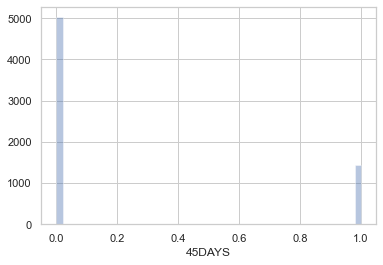

In [30]:
sns.distplot(df2["45DAYS"],kde=False, rug=False);

### Balanced

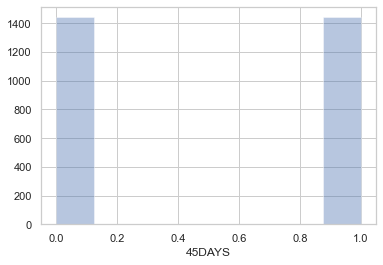

In [31]:
sns.distplot(balanced_df["45DAYS"],kde=False, rug=False);

## Feature dimension reduction 

### Remove constant, quasi constant and duplicate features

In [32]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X2_train)
Xb_train_filter=constant_filter.transform(X2_train)
Xb_test_filter = constant_filter.transform(X2_test)

In [33]:
Xb_train_filter.shape,Xb_test_filter.shape

((2453, 99), (433, 99))

In [34]:
#remove duplicate features
Xb_train_T=Xb_train_filter.T
Xb_test_T=Xb_test_filter.T

In [35]:
Xb_train_T=pd.DataFrame(Xb_train_T)
Xb_test_T=pd.DataFrame(Xb_test_T)

In [36]:
Xb_train_T.duplicated().sum()

3

In [37]:
duplicated_features=Xb_train_T.duplicated()

In [38]:
features_to_keep=[not index for index in duplicated_features]

Xb_train_unique=Xb_train_T[features_to_keep].T
Xb_test_unique=Xb_test_T[features_to_keep].T

### Feature scaling 

In [39]:
scaler=StandardScaler().fit(Xb_train_unique)
Xb_train_unique=scaler.transform(Xb_train_unique)
Xb_test_unique = scaler.transform(Xb_test_unique)

In [40]:
Xb_train_unique=pd.DataFrame(Xb_train_unique)
Xb_test_unique=pd.DataFrame(Xb_test_unique)

In [41]:
Xb_train_unique.shape,Xb_test_unique.shape

((2453, 96), (433, 96))

In [42]:
y2_train.shape,y2_test.shape

((2453,), (433,))

### Removal of correlated features

In [43]:
corrmat=Xb_train_unique.corr()

In [44]:
#find correlated features 
def get_correlation(balanced_df,threshold):
    corr_col=set()
    corrmat=balanced_df.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])> threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col
corr_features = get_correlation(Xb_train_unique, 0.70)
print ('correlated features:', len(set(corr_features)))

correlated features: 38


In [45]:
Xb_train_uncorr=Xb_train_unique.drop(labels=corr_features, axis=1)
Xb_test_uncorr=Xb_test_unique.drop(labels=corr_features, axis=1)


In [46]:
Xb_train_uncorr.shape,Xb_test_uncorr.shape

((2453, 58), (433, 58))

## Feauture selection

### Using KBest

In [47]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 41 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(abs(Xb_train_uncorr),y2_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(abs(Xb_train_uncorr).columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(40,'Score'))  #print 10 best features

    Specs       Score
17     17  153.428608
41     54  116.803278
39     47   87.810867
32     34   65.809642
7       7   65.786535
8       8   53.244645
13     13   42.655562
19     19   42.378694
29     31   25.450333
23     25   24.990023
24     26   23.416413
15     15   19.558341
16     16   15.948831
35     41   15.270449
12     12   12.355858
11     11   10.856968
31     33   10.411272
30     32    6.370046
36     42    6.281939
46     62    5.321578
3       3    5.123851
34     40    3.924949
52     76    3.907077
22     24    3.818104
6       6    3.461178
10     10    3.440285
33     38    3.429669
26     28    3.333560
38     46    2.431313
5       5    2.009482
45     60    1.713467
54     79    1.684234
43     58    1.668351
0       0    1.223144
1       1    1.130776
28     30    1.034033
4       4    0.973232
44     59    0.723227
25     27    0.717639
9       9    0.696828


### Pearson Coeff

In [48]:
num_feats=40
def cor_selector(Xb_train_uncorr, y2_train,num_feats):
    cor_list = []
    feature_name = Xb_train_uncorr.columns.tolist()
    # calculate the correlation with y for each feature
    for i in Xb_train_uncorr.columns.tolist():
        cor = np.corrcoef(Xb_train_uncorr[i], y2_train)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = Xb_train_uncorr.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(Xb_train_uncorr, y2_train,num_feats)
print(str(len(cor_feature)), 'selected features')

40 selected features


### Chi Squared

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
num_feats=39

In [50]:
X_norm = MinMaxScaler().fit_transform(Xb_train_uncorr)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y2_train)
chi_support = chi_selector.get_support()
chi_feature = Xb_train_uncorr.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

39 selected features


### Recursive Feature Elimination

In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
num_feats=39
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm,y2_train)
rfe_support = rfe_selector.get_support()
rfe_feature = Xb_train_uncorr.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 58 features.
Fitting estimator with 48 features.
39 selected features


c:\users\ekvaeri\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Lasso

In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
embeded_lr_selector.fit(X_norm,y2_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = Xb_train_uncorr.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

25 selected features


c:\users\ekvaeri\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Ridge

In [53]:
sel1= SelectFromModel(LogisticRegression(penalty='l1', C=10, solver='liblinear'))
sel1.fit(Xb_train_uncorr,y2_train)

embeded_l1_support = sel1.get_support()
embeded_l1_feature = Xb_train_uncorr.loc[:,embeded_l1_support].columns.tolist()
print(str(len(embeded_l1_feature)), 'selected features')



57 selected features


### Tree based selectfrommodel

In [54]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(Xb_train_uncorr, y2_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = Xb_train_uncorr.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

26 selected features


### SelectFromModel LinearRegression to select features

In [55]:
embeded_lir_selector = SelectFromModel(LinearRegression(), max_features=num_feats)
embeded_lir_selector.fit(X_norm,y2_train)

embeded_lir_support = embeded_lir_selector.get_support()
embeded_lir_feature = Xb_train_uncorr.loc[:,embeded_lir_support].columns.tolist()
print(str(len(embeded_lir_feature)), 'selected features')

22 selected features


## Comparison of feature selecting methods

In [56]:
len(embeded_lir_support)

58

In [57]:
feature_name=list(Xb_train_uncorr)


In [58]:

columnsNamesArr = df2.columns.values
Names=df2.columns.values[feature_name]
Names

array(['CSR ID', '3PP (Vol)', 'Business Units', 'Competence Domain',
       'Competence SubDomain', 'Contract Type', 'CNS', 'CROU BP',
       '3PP (Days)', 'Flag: CSR Backdated / Forwarded', 'Flag: Hot',
       'Flag: Hot FTS', 'Cause Code', 'Flag: CB Backdated',
       'CB Not Prov Overdue (Vol)', 'CB Prov on Tgt (Vol)',
       'CB Prov (Vol)', 'CSR Closed (Vol)', 'Cost Allocation',
       'DEL Acc (Vol)', 'DEL Pend Acc (Vol)', 'Issue Category',
       'Last Status', 'CSR Open (Vol)', 'Original Severity', 'CSR Origin',
       'Flag: Overdue CSR', 'Product Life Cycle', 'REM Acc (Vol)',
       'REM Not Prov Overdue (Vol)', 'REM Prov not on Tgt (Vol)',
       'REM Prov on Tgt (Vol)', 'REM Prov (Vol)', 'RST Acc (Vol)',
       'RST pend Acc (Vol)', 'RST Prov not on Tgt (Vol)',
       'RST Prov on Tgt (Vol)', 'RST Prov (Vol)', 'CSR (Vol)', 'Customer',
       'Hours', 'x Days - TMR after CSR Closure', 'Global Hours',
       'Hrs/CSR', 'EER Country', 'EROU Level', 'EROU SF Full Name',
       

In [59]:
# put all selection together
feature_selection_df = pd.DataFrame({'Names':Names,'Feature':feature_name,'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,'Logistics l1':embeded_l1_support, 'Logistics l2':embeded_lr_support,
                                    'Linear Reg':embeded_lir_support,'Random Forest':embeded_rf_support, })
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total'] , ascending=False)
#feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Names,Feature,Pearson,Chi-2,RFE,Logistics l1,Logistics l2,Linear Reg,Random Forest,Total
57,Date: Closed Month,87,False,False,False,True,False,False,True,89.0
56,Date: Closed Year,86,False,False,False,True,False,False,True,88.0
55,Date: Started Day,84,False,False,True,True,False,False,True,87.0
54,Flag: Has TR,79,True,False,True,True,True,True,True,85.0
53,Time Reported (Min),78,True,True,True,True,True,True,True,85.0
52,Sold to Party Country,76,False,False,False,True,False,False,False,77.0
51,Sold to Party,75,False,False,False,True,False,False,True,77.0
50,Severity,74,False,False,True,True,False,False,True,77.0
49,Flag: REM Backdated,72,False,False,False,True,False,False,False,73.0
48,Network,68,False,False,False,True,False,False,False,69.0


### Feature Importance

[0.0248479  0.00411598 0.01506173 0.01646011 0.0187497  0.01357917
 0.01185728 0.01521343 0.00360857 0.0146007  0.0013234  0.02327854
 0.00929291 0.01801703 0.02006807 0.03588784 0.02516474 0.01576601
 0.0199064  0.01852314 0.03174164 0.00834516 0.018837   0.00564931
 0.04035688 0.01545987 0.01276608 0.01760358 0.01239332 0.0042769
 0.01885222 0.00986506 0.02583875 0.01679865 0.02244349 0.03266588
 0.00515364 0.01932453 0.00493208 0.00797915 0.01729969 0.01840168
 0.01882896 0.02133592 0.01869174 0.01830066 0.0213212  0.01951821
 0.01720841 0.01814828 0.01990001 0.01977451 0.01865273 0.02182718
 0.01980261 0.01718137 0.01801546 0.01918554]


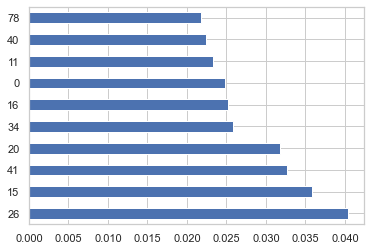

In [60]:
import pandas as pd
import numpy as np


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xb_train_uncorr,y2_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xb_train_uncorr.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##  Random Forest


### Random Search cross validation in Scikit Learn

In [61]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint

rf = RandomForestClassifier(random_state = 42)



# Look at parameters used by ourcurrent forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Random Hyperparameter Grid

In [62]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [77]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(Xb_train_uncorr, y2_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.2s


KeyboardInterrupt: 

Best parameters

In [171]:
rf_random.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

### 3.Use Tree-Based Algorithms balanced target
* Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.
* In modern applied machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.) almost always outperform singular decision trees, so we'll jump right into those

### Hyperparameter tuning and cross validation Decision Tree Calssifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
seed = 7
num_trees = 100
max_features = 7
# Train model
clf_7 = RandomForestClassifier(random_state=42,criterion='entropy',n_estimators=100,max_leaf_nodes=10,
min_samples_split=10,
min_samples_leaf=2,
max_features= 'sqrt',
max_depth=20,
bootstrap= False, n_jobs=-1)
clf_7=clf_7.fit(Xb_train_uncorr, y2_train)
#Skfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
    
scores=cross_val_score(clf_7, Xb_test_uncorr, y2_test, cv=5)
pred_y_4 = cross_val_predict(clf_7, Xb_test_uncorr, y2_test, cv=5)
# Predict on training set
#pred_y_4 = clf_7.predict(Xb_test_uncorr)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
#print("Accuracy balanced target")
#print( accuracy_score(y2_test, pred_y_4) )
# 0.9744
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print(confusion_matrix(y2_test, pred_y_4 ))
print(classification_report(y2_test, pred_y_4 ))

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0 1]
[[184  44]
 [ 92 113]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       228
           1       0.72      0.55      0.62       205

    accuracy                           0.69       433
   macro avg       0.69      0.68      0.68       433
weighted avg       0.69      0.69      0.68       433

Accuracy: 0.69 (+/- 0.06)


# FINE TUNING IN ALL ALGORITHMS

### Bagged Decision Trees

In [64]:
y2 = balanced_df["45DAYS"]
X2 = balanced_df.drop("45DAYS", axis=1)

Using x2 and y2 whole data set without feaature engineering

In [65]:
# Bagged Decision Trees for Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, Xb_train_uncorr, y2_train, cv=kfold)
print(results.mean())
resultspred = cross_val_predict(model, Xb_test_uncorr, y2_test, cv=kfold)
print(results.mean())

print(classification_report(y2_test, resultspred ))

print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2))

print(confusion_matrix(y2_test, pred_y_4 ))

c:\users\ekvaeri\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7912792434046789
0.7912792434046789
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       228
           1       0.65      0.59      0.62       205

    accuracy                           0.66       433
   macro avg       0.66      0.65      0.65       433
weighted avg       0.66      0.66      0.65       433

Accuracy: 0.79 (+/- 0.05)
[[184  44]
 [ 92 113]]


### Extra trees

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
seed = 7
num_trees = 100
max_features = 7
Skfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model,  Xb_train_uncorr, y2_train, cv=Skfold)
print(results.mean())

resultspred = cross_val_predict(model,Xb_test_uncorr, y2_test, cv=Skfold)


print(classification_report(y2_test, resultspred ))

print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2))
print(confusion_matrix(y2_test, resultspred ))


model.fit(Xb_train_uncorr, y2_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

c:\users\ekvaeri\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7859399369503899
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       228
           1       0.71      0.62      0.66       205

    accuracy                           0.70       433
   macro avg       0.70      0.70      0.70       433
weighted avg       0.70      0.70      0.70       433

Accuracy: 0.79 (+/- 0.06)
[[176  52]
 [ 77 128]]


In [67]:
len(resultspred)

433

In [68]:
len(y2_test)

433

In [69]:
resultspred[0:len(resultspred)]


array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [71]:
y2_test[0:len(y2_test)]

2693    1
791     0
227     0
2671    1
104     0
       ..
2600    1
1068    0
1698    1
1061    0
2413    1
Name: 45DAYS, Length: 433, dtype: int32

In [78]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['resultspred', 'y2_test'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[resultspred[0:len(resultspred)], # 1st column
                       y2_test[0:len(resultspred)]], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=300)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [206]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Xb_test_uncorr, y2_test)

print(result)

0.7875288683602771


### Boosting 

### Ada boosting

In [176]:

# AdaBoost Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, Xb_train_uncorr, y2_train, cv=kfold)
print(results.mean())

resultspred = cross_val_predict(model,Xb_test_uncorr, y2_test, cv=kfold)


print(classification_report(y2_test, resultspred ))

print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2))

c:\users\ekvaeri\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7264559482329517
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       228
           1       0.65      0.63      0.64       205

    accuracy                           0.67       433
   macro avg       0.67      0.67      0.67       433
weighted avg       0.67      0.67      0.67       433

Accuracy: 0.73 (+/- 0.04)


### Stochastic gradient boosting

In [177]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, Xb_train_uncorr, y2_train, cv=kfold)
print(results.mean())

resultspred = cross_val_predict(model,Xb_test_uncorr, y2_test, cv=kfold)


print(classification_report(y2_test, resultspred ))

print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2))

c:\users\ekvaeri\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7712974946075992
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       228
           1       0.64      0.63      0.63       205

    accuracy                           0.65       433
   macro avg       0.65      0.65      0.65       433
weighted avg       0.65      0.65      0.65       433

Accuracy: 0.77 (+/- 0.03)


## Voting Ensemble for Classification

In [178]:

# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble,Xb_train_uncorr, y2_train, cv=kfold)
print(results.mean())

resultspred = cross_val_predict(model,Xb_test_uncorr, y2_test, cv=kfold)


print(classification_report(y2_test, resultspred ))

print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2))

c:\users\ekvaeri\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7545710967313755
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       228
           1       0.64      0.63      0.63       205

    accuracy                           0.65       433
   macro avg       0.65      0.65      0.65       433
weighted avg       0.65      0.65      0.65       433

Accuracy: 0.75 (+/- 0.04)


## Logistic Regression Coefficient L1 regularization  unbalanced target

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
sel= SelectFromModel(LogisticRegression(penalty='l1', C=10, solver='liblinear'))
sel.fit(Xb_train_uncorr,y2_train)
sel.get_support()
sel.estimator_.coef_

array([[-0.33105217, -0.04836405, -0.15178237,  0.10229079, -0.08840078,
        -0.22573294,  0.28513925, -0.29663504,  0.03982429,  0.18255725,
         0.02179852,  0.10132102, -0.05578155,  0.22315813,  0.02456136,
         0.35077328, -0.32004546,  0.41337091,  0.08030858,  0.32004287,
        -0.33403522, -0.09496892,  0.33352121,  0.2229786 ,  0.20387046,
        -0.08334491, -0.08664431, -0.71571566, -0.10238781, -0.26785649,
         0.48863564,  0.63168148, -0.48663979,  0.2432536 ,  0.19611294,
        -0.24509877, -0.10599628,  0.19811717, -0.01396237,  0.03061945,
         0.03922881,  0.27347855, -0.12958619, -0.12881809,  0.02339712,
        -0.02710839,  0.34549493,  0.06571725,  0.04750426,  0.01010121,
         0.18433892, -0.01192501,  0.06712962, -0.4249011 , -0.19866568,
        -0.04319213, -0.05855516, -0.03618723]])

In [180]:
sel.estimator_.coef_

array([[-0.33105217, -0.04836405, -0.15178237,  0.10229079, -0.08840078,
        -0.22573294,  0.28513925, -0.29663504,  0.03982429,  0.18255725,
         0.02179852,  0.10132102, -0.05578155,  0.22315813,  0.02456136,
         0.35077328, -0.32004546,  0.41337091,  0.08030858,  0.32004287,
        -0.33403522, -0.09496892,  0.33352121,  0.2229786 ,  0.20387046,
        -0.08334491, -0.08664431, -0.71571566, -0.10238781, -0.26785649,
         0.48863564,  0.63168148, -0.48663979,  0.2432536 ,  0.19611294,
        -0.24509877, -0.10599628,  0.19811717, -0.01396237,  0.03061945,
         0.03922881,  0.27347855, -0.12958619, -0.12881809,  0.02339712,
        -0.02710839,  0.34549493,  0.06571725,  0.04750426,  0.01010121,
         0.18433892, -0.01192501,  0.06712962, -0.4249011 , -0.19866568,
        -0.04319213, -0.05855516, -0.03618723]])

In [181]:
X_train_l1=sel.transform(Xb_train_uncorr)
X_test_l1=sel.transform(Xb_test_uncorr)

In [182]:
from sklearn.ensemble import RandomForestClassifier

 
# Train model
clf_4 = RandomForestClassifier(random_state=42,criterion='entropy',n_estimators=100,max_leaf_nodes=10,
min_samples_split=10,
min_samples_leaf=2,
max_features= 'sqrt',
max_depth=20,
bootstrap= False, n_jobs=-1)
clf_4=clf_4.fit(X_train_l1, y2_train)


scores2=cross_val_score(clf_4, X_test_l1, y2_test, cv=Skfold)
ypred = cross_val_predict(clf_4, X_test_l1, y2_test, cv=3)
# Predict on training set
#pred_y_4 = clf_4.predict(X_test_l1)
 
# Is our model still predicting just one class?
#print( np.unique( ypred ) )
# [0 1]
 
# How's our accuracy?
#print("Accuracy balanced target")
#print( accuracy_score(y2_test, ypred) )
# 0.9744
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y2_test, ypred))
print(classification_report(y2_test, ypred))

print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

[[172  56]
 [ 86 119]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       228
           1       0.68      0.58      0.63       205

    accuracy                           0.67       433
   macro avg       0.67      0.67      0.67       433
weighted avg       0.67      0.67      0.67       433

Accuracy: 0.68 (+/- 0.15)


## Logistic Regression Coefficient L2 regularization  unbalanced target

In [183]:
sel= SelectFromModel(LogisticRegression(penalty='l2', C=10, solver='liblinear'))
sel.fit(Xb_train_uncorr,y2_train)
sel.get_support()

array([ True, False, False, False, False,  True,  True,  True, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False])

In [184]:
X_train_l2=sel.transform(Xb_train_uncorr)
X_test_l2=sel.transform(Xb_test_uncorr)

In [185]:
from sklearn.ensemble import RandomForestClassifier

 
# Train model
clf_4 = RandomForestClassifier(random_state=42,criterion='entropy',n_estimators=100,max_leaf_nodes=10,
min_samples_split=10,
min_samples_leaf=2,
max_features= 'sqrt',
max_depth=20,
bootstrap= False, n_jobs=-1)
clf_4=clf_4.fit(X_train_l2, y2_train)


scores2=cross_val_score(clf_4, X_test_l2, y2_test, cv=Skfold)
ypred = cross_val_predict(clf_4, X_test_l2, y2_test, cv=3)
# Predict on training set
#pred_y_4 = clf_4.predict(X_test_l1)
 
# Is our model still predicting just one class?
#print( np.unique( ypred ) )
# [0 1]
 
# How's our accuracy?
#print("Accuracy balanced target")
#print( accuracy_score(y2_test, ypred) )
# 0.9744
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y2_test, ypred))
print(classification_report(y2_test, ypred))

print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

[[160  68]
 [ 88 117]]
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       228
           1       0.63      0.57      0.60       205

    accuracy                           0.64       433
   macro avg       0.64      0.64      0.64       433
weighted avg       0.64      0.64      0.64       433

Accuracy: 0.67 (+/- 0.12)


### Feature dimension reduction by LDA ir IS it a Classifier

In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

In [187]:
lda=LDA(n_components=1)


In [188]:
Xb_train_lda=lda.fit_transform(Xb_train_uncorr,y2_train)

In [189]:
Xb_train_lda.shape

(2453, 1)

In [190]:
Xb_test_lda=lda.transform(Xb_test_uncorr)

In [191]:
from sklearn.ensemble import RandomForestClassifier

 
# Train model
clf_4 = RandomForestClassifier(random_state=42,criterion='entropy',n_estimators=100,max_leaf_nodes=10,
min_samples_split=10,
min_samples_leaf=2,
max_features= 'sqrt',
max_depth=20,
bootstrap= False, n_jobs=-1)
clf_4=clf_4.fit(Xb_train_lda, y2_train)


scores2=cross_val_score(clf_4, Xb_test_lda, y2_test, cv=Skfold)
ypred = cross_val_predict(clf_4, Xb_test_lda, y2_test, cv=3)
# Predict on training set
#pred_y_4 = clf_4.predict(X_test_l1)
 
# Is our model still predicting just one class?
#print( np.unique( ypred ) )
# [0 1]
 
# How's our accuracy?
#print("Accuracy balanced target")
#print( accuracy_score(y2_test, ypred) )
# 0.9744
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y2_test, ypred))
print(classification_report(y2_test, ypred))

print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

[[166  62]
 [ 69 136]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       228
           1       0.69      0.66      0.67       205

    accuracy                           0.70       433
   macro avg       0.70      0.70      0.70       433
weighted avg       0.70      0.70      0.70       433

Accuracy: 0.68 (+/- 0.21)


### Feature Reduction by PCA 

In [192]:
from sklearn.decomposition import PCA

In [193]:
pca=PCA(n_components=39,random_state=42)
pca.fit(Xb_test_uncorr)

PCA(n_components=39, random_state=42)

Increasing the number of components increases the accuracy

In [194]:
Xb_train_pca=pca.transform(Xb_train_uncorr)
Xb_test_pca=pca.transform(Xb_test_uncorr)
Xb_train_pca.shape,Xb_test_pca.shape

((2453, 39), (433, 39))

In [195]:
from sklearn.ensemble import RandomForestClassifier

 
# Train model
clf_4 = RandomForestClassifier(random_state=42,criterion='entropy',n_estimators=100,max_leaf_nodes=10,
min_samples_split=10,
min_samples_leaf=2,
max_features= 'sqrt',
max_depth=20,
bootstrap= False, n_jobs=-1)
clf_4=clf_4.fit(Xb_train_pca, y2_train)


scores2=cross_val_score(clf_4, Xb_test_pca, y2_test, cv=Skfold)
ypred = cross_val_predict(clf_4, Xb_test_pca, y2_test, cv=3)
# Predict on training set
#pred_y_4 = clf_4.predict(X_test_l1)
 
# Is our model still predicting just one class?
#print( np.unique( ypred ) )
# [0 1]
 
# How's our accuracy?
#print("Accuracy balanced target")
#print( accuracy_score(y2_test, ypred) )
# 0.9744
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y2_test, ypred))
print(classification_report(y2_test, ypred))

print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

[[162  66]
 [ 93 112]]
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       228
           1       0.63      0.55      0.58       205

    accuracy                           0.63       433
   macro avg       0.63      0.63      0.63       433
weighted avg       0.63      0.63      0.63       433

Accuracy: 0.63 (+/- 0.09)


## K NN

Optimizar k 

([<matplotlib.axis.XTick at 0x1f5257d8>,
 <a list of 5 Text major ticklabel objects>)

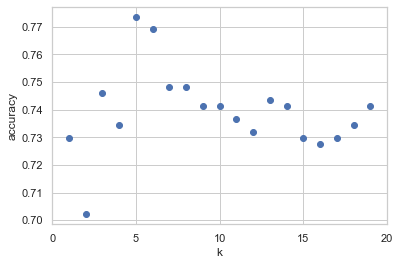

In [196]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Xb_train_uncorr, y2_train)
    scores.append(knn.score(Xb_test_uncorr, y2_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Usando k=20

In [197]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors=7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(Xb_train_uncorr, y2_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(Xb_train_uncorr, y2_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(Xb_test_uncorr, y2_test)))

scores = cross_val_score(knn, Xb_train_uncorr, y2_train, cv=5)

pred = knn.predict(Xb_test_uncorr)
print(confusion_matrix(y2_test, pred))
print(classification_report(y2_test, pred))

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.75
[[176  52]
 [ 57 148]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       228
           1       0.74      0.72      0.73       205

    accuracy                           0.75       433
   macro avg       0.75      0.75      0.75       433
weighted avg       0.75      0.75      0.75       433

Accuracy: 0.73 (+/- 0.03)


SVM 

In [198]:
from sklearn.svm import SVC
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)
clf.fit(Xb_train_uncorr, y2_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(clf.score(Xb_train_uncorr, y2_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(clf.score(Xb_test_uncorr, y2_test)))

scores = cross_val_score(clf, Xb_train_uncorr, y2_train, cv=5)

pred = clf.predict(Xb_test_uncorr)
print(confusion_matrix(y2_test, pred))
print(classification_report(y2_test, pred))

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of SVM classifier on training set: 0.72
Accuracy of SVM classifier on test set: 0.71
[[161  67]
 [ 59 146]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       228
           1       0.69      0.71      0.70       205

    accuracy                           0.71       433
   macro avg       0.71      0.71      0.71       433
weighted avg       0.71      0.71      0.71       433

Accuracy: 0.70 (+/- 0.04)


Log Regression

In [199]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0).fit(Xb_train_uncorr, y2_train)


print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(clf.score(Xb_train_uncorr, y2_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(clf.score(Xb_test_uncorr, y2_test)))

scores = cross_val_score(clf, Xb_train_uncorr, y2_train, cv=5)

pred = clf.predict(Xb_test_uncorr)
print(confusion_matrix(y2_test, pred))
print(classification_report(y2_test, pred))

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of SVM classifier on training set: 0.72
Accuracy of SVM classifier on test set: 0.70
[[159  69]
 [ 59 146]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       228
           1       0.68      0.71      0.70       205

    accuracy                           0.70       433
   macro avg       0.70      0.70      0.70       433
weighted avg       0.71      0.70      0.70       433

Accuracy: 0.69 (+/- 0.04)
